# Forecasting


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df["log_sales"]=np.log(df["Sales"])
df.head()

,Quarter,Sales,log_sales
0,Q1_86,1734.827000,7.458663
1,Q2_86,2244.960999,7.716443
2,Q3_86,2533.804993,7.837477
3,Q4_86,2154.962997,7.675529
4,Q1_87,1547.818996,7.344602


In [5]:
df["t"]=range(1,len(df)+1)

In [6]:
df["t_square"]=np.square(df["t"])

In [7]:
df.head()

,Quarter,Sales,log_sales,t,t_square
0,Q1_86,1734.827000,7.458663,1,1
1,Q2_86,2244.960999,7.716443,2,4
2,Q3_86,2533.804993,7.837477,3,9
3,Q4_86,2154.962997,7.675529,4,16
4,Q1_87,1547.818996,7.344602,5,25


In [8]:
df["Quarters"]=df["Quarter"].str[:2]

In [9]:
df.head()

,Quarter,Sales,log_sales,t,t_square,Quarters
0,Q1_86,1734.827000,7.458663,1,1,Q1
1,Q2_86,2244.960999,7.716443,2,4,Q2
2,Q3_86,2533.804993,7.837477,3,9,Q3
3,Q4_86,2154.962997,7.675529,4,16,Q4
4,Q1_87,1547.818996,7.344602,5,25,Q1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   log_sales  42 non-null     float64
 3   t          42 non-null     int64  
 4   t_square   42 non-null     int64  
 5   Quarters   42 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ KB


In [11]:
#df_dummies=pd.get_dummies(df["Quarters"],columns=["Q1","Q2","Q3","Q4"]).re
#df=pd.concat([df,df_dummies],axis=1)

In [12]:
df=pd.get_dummies(df,columns=["Quarters"])
df.head()

,Quarter,Sales,log_sales,t,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,7.458663,1,1,1,0,0,0
1,Q2_86,2244.960999,7.716443,2,4,0,1,0,0
2,Q3_86,2533.804993,7.837477,3,9,0,0,1,0
3,Q4_86,2154.962997,7.675529,4,16,0,0,0,1
4,Q1_87,1547.818996,7.344602,5,25,1,0,0,0


In [13]:
df.head()

,Quarter,Sales,log_sales,t,t_square,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,7.458663,1,1,1,0,0,0
1,Q2_86,2244.960999,7.716443,2,4,0,1,0,0
2,Q3_86,2533.804993,7.837477,3,9,0,0,1,0
3,Q4_86,2154.962997,7.675529,4,16,0,0,0,1
4,Q1_87,1547.818996,7.344602,5,25,1,0,0,0


In [14]:
df.rename(columns={"Quarters_Q1":"Q1","Quarters_Q2":"Q2","Quarters_Q3":"Q3","Quarters_Q4":"Q4"},inplace=True)
df.head()

,Quarter,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,7.458663,1,1,1,0,0,0
1,Q2_86,2244.960999,7.716443,2,4,0,1,0,0
2,Q3_86,2533.804993,7.837477,3,9,0,0,1,0
3,Q4_86,2154.962997,7.675529,4,16,0,0,0,1
4,Q1_87,1547.818996,7.344602,5,25,1,0,0,0


In [15]:
df.tail()

,Quarter,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
37,Q2_95,4936.0,8.504311,38,1444,0,1,0,0
38,Q3_95,4895.0,8.495970,39,1521,0,0,1,0
39,Q4_95,4333.0,8.374015,40,1600,0,0,0,1
40,Q1_96,4194.0,8.341410,41,1681,1,0,0,0
41,Q2_96,5253.0,8.566555,42,1764,0,1,0,0


In [16]:
len(df)

42

In [17]:
df.tail()

,Quarter,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
37,Q2_95,4936.0,8.504311,38,1444,0,1,0,0
38,Q3_95,4895.0,8.495970,39,1521,0,0,1,0
39,Q4_95,4333.0,8.374015,40,1600,0,0,0,1
40,Q1_96,4194.0,8.341410,41,1681,1,0,0,0
41,Q2_96,5253.0,8.566555,42,1764,0,1,0,0


In [18]:
df.shape

(42, 9)

In [19]:
# set the Quarter column as the index

df.set_index("Quarter",inplace=True)
df.head()

,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
Quarter,,,,,,,,
Q1_86,1734.827000,7.458663,1,1,1,0,0,0
Q2_86,2244.960999,7.716443,2,4,0,1,0,0
Q3_86,2533.804993,7.837477,3,9,0,0,1,0
Q4_86,2154.962997,7.675529,4,16,0,0,0,1
Q1_87,1547.818996,7.344602,5,25,1,0,0,0


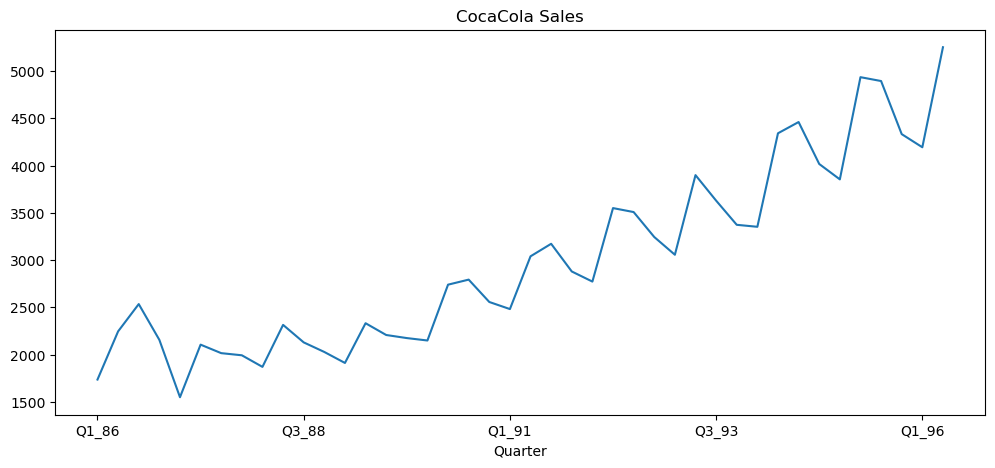

In [20]:
# plot the timeseries
df["Sales"].plot(figsize=(12,5),title="CocaCola Sales"); 

In [21]:
# create a pivot table with Years as the index and Quarters as the columns and CocaCola Sales as the values 

df_pivot=df.pivot_table(values="Sales",index="19"+df.index.str[3:],columns=df.index.str[0:2])
df_pivot

Quarter,Q1,Q2,Q3,Q4
Quarter,,,,
1986,1734.827000,2244.960999,2533.804993,2154.962997
1987,1547.818996,2104.411995,2014.362999,1991.746998
1988,1869.049999,2313.631996,2128.320000,2026.828999
1989,1910.603996,2331.164993,2206.549995,2173.967995
1990,2148.278000,2739.307999,2792.753998,2556.009995
1991,2480.973999,3039.522995,3172.115997,2879.000999
1992,2772.000000,3550.000000,3508.000000,3243.859993
1993,3056.000000,3899.000000,3629.000000,3373.000000
1994,3352.000000,4342.000000,4461.000000,4017.000000


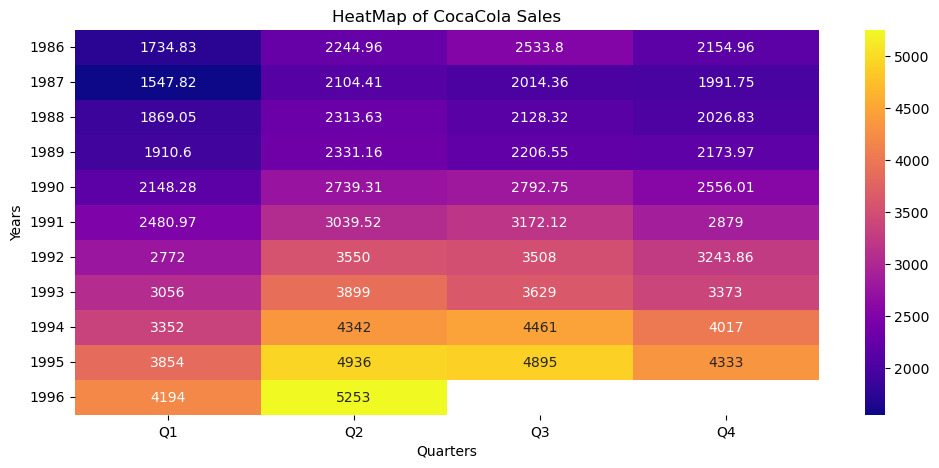

In [22]:
# visualize the pivot table as a heatmap

plt.figure(figsize=(12,5))
sns.heatmap(df_pivot,annot=True,cmap="plasma",fmt="g")
plt.title("HeatMap of CocaCola Sales")
plt.xlabel("Quarters")
plt.ylabel("Years");

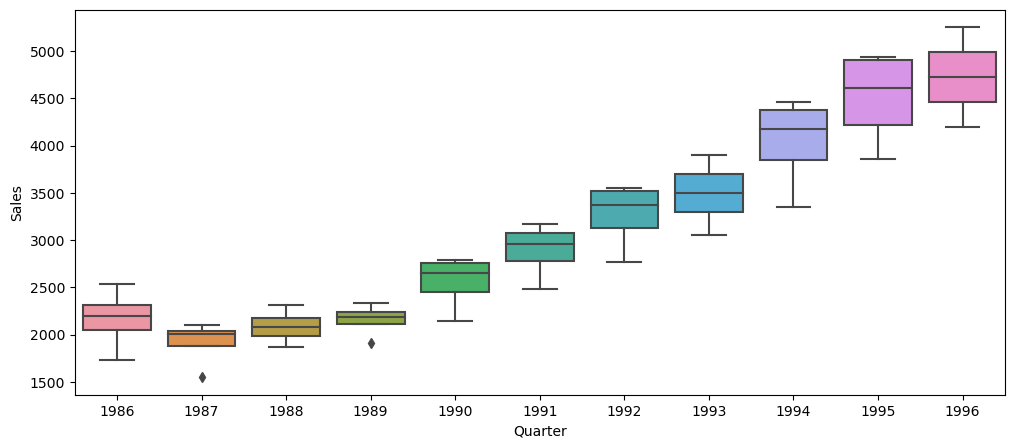

In [23]:
# boxplot of CocaCola Sales for evry year 
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x="19"+df.index.str[3:],y="Sales");

## Train Test Split of the Time Series Data

In [24]:
train=df.head(len(df)-8)
test=df.tail(8)

In [25]:
train.head()

,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
Quarter,,,,,,,,
Q1_86,1734.827000,7.458663,1,1,1,0,0,0
Q2_86,2244.960999,7.716443,2,4,0,1,0,0
Q3_86,2533.804993,7.837477,3,9,0,0,1,0
Q4_86,2154.962997,7.675529,4,16,0,0,0,1
Q1_87,1547.818996,7.344602,5,25,1,0,0,0


In [26]:
train.tail()

,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
Quarter,,,,,,,,
Q2_93,3899.0,8.268475,30,900,0,1,0,0
Q3_93,3629.0,8.196712,31,961,0,0,1,0
Q4_93,3373.0,8.123558,32,1024,0,0,0,1
Q1_94,3352.0,8.117312,33,1089,1,0,0,0
Q2_94,4342.0,8.376090,34,1156,0,1,0,0


In [27]:
test

,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4
Quarter,,,,,,,,
Q3_94,4461.0,8.403128,35,1225,0,0,1,0
Q4_94,4017.0,8.298291,36,1296,0,0,0,1
Q1_95,3854.0,8.256867,37,1369,1,0,0,0
Q2_95,4936.0,8.504311,38,1444,0,1,0,0
Q3_95,4895.0,8.495970,39,1521,0,0,1,0
Q4_95,4333.0,8.374015,40,1600,0,0,0,1
Q1_96,4194.0,8.341410,41,1681,1,0,0,0
Q2_96,5253.0,8.566555,42,1764,0,1,0,0


In [28]:
train.shape,test.shape

((34, 8), (8, 8))

## Analyzing Forecasting Models RMSE Values

## Linear Regression

In [29]:
from statsmodels.formula.api import ols 
from statsmodels.tools.eval_measures import rmse

In [30]:
model=ols("Sales ~ t",data=train).fit()

In [31]:
pred_lin=model.predict(test["t"])
rmse_lin=rmse(test["Sales"],pred_lin)
print( "RMSE of Linear Model : ",rmse_lin)

RMSE of Linear Model :  720.6137817965259


## Exponential Model

In [32]:
model=ols("log_sales ~ t",data=train).fit()

In [33]:
pred_log=model.predict(test["t"])
rmse_log=rmse(test["Sales"],np.exp(pred_log))
print( "RMSE of Exponential Model : ",rmse_log) 

RMSE of Exponential Model :  564.9850937274292


## Quadratic Model

In [34]:
model=ols("Sales ~ t+t_square",data=train).fit()

In [35]:
pred_quad=model.predict(test[["t","t_square"]])
rmse_quad=rmse(test["Sales"],pred_quad)
print( "RMSE of Quadratic Model : ",rmse_quad) 

RMSE of Quadratic Model :  437.7455637558559


## Additive Seasonality Model

In [36]:
model=ols("Sales ~ Q1 + Q2 + Q3 + Q4",data=train).fit()

In [37]:
pred_add=model.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add=rmse(test["Sales"],pred_add)
print( "RMSE of Additive Seasonality Model : ",rmse_add)

RMSE of Additive Seasonality Model :  1870.1899069853293


## Quadratic Model with Additive Seasonality

In [38]:
model=ols("Sales ~ t + t_square + Q1 + Q2 + Q3 + Q4",
          data=train).fit()

In [39]:
pred_quad_add=model.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_quad_add=rmse(test["Sales"],pred_quad_add)
print( "RMSE of Quadratic Model with Additive Seasonality : ",rmse_quad_add)

RMSE of Quadratic Model with Additive Seasonality :  257.67172565362677


## Multiplicative Seasonality Model 

In [40]:
model=ols("log_sales ~ Q1 + Q2 + Q3 + Q4",
          data=train).fit()

In [41]:
pred_mul=model.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_mul=rmse(test["Sales"],np.exp(pred_mul)) 
print( "RMSE of Multiplicative Model : ",rmse_mul)

RMSE of Multiplicative Model :  1940.8042499186577


## Multiplicative Seasonality with Additive Trend

In [42]:
model=ols("log_sales ~ t + Q1 + Q2 + Q3 + Q4",
          data=train).fit()

In [43]:
pred_mul_add=model.predict(test[["t","Q1","Q2","Q3","Q4"]])
rmse_mul_add=rmse(test["Sales"],np.exp(pred_mul_add))
print( "RMSE of Multiplicative Seasonality with Additive Trend : ",rmse_mul_add) 

RMSE of Multiplicative Seasonality with Additive Trend :  400.42004584362434


## Model Comparsion

In [44]:
# compare the RMSE of all the models in a single datframe

rmse_df=pd.DataFrame({"Model": ["Linear",
                                "Exponential",
                               "Quadratic",
                               "Additive Seasonality",
                               "Quadratic with Additive Seasonality",
                               "Multiplicative Seasonality",
                               "Multiplicative Seasonality with Additive Trend"],
                     "RMSE": [rmse_lin,rmse_log,rmse_quad,rmse_add,rmse_quad_add,
                             rmse_mul,rmse_mul_add]})
rmse_df

,Model,RMSE
0,Linear,720.613782
1,Exponential,564.985094
2,Quadratic,437.745564
3,Additive Seasonality,1870.189907
4,Quadratic with Additive Seasonality,257.671726
5,Multiplicative Seasonality,1940.804250
6,Multiplicative Seasonality with Additive Trend,400.420046


In [45]:
# sort the dataframe by RMSE in descending order

rmse_df.sort_values(by="RMSE",ascending=True)

,Model,RMSE
4,Quadratic with Additive Seasonality,257.671726
6,Multiplicative Seasonality with Additive Trend,400.420046
2,Quadratic,437.745564
1,Exponential,564.985094
0,Linear,720.613782
3,Additive Seasonality,1870.189907
5,Multiplicative Seasonality,1940.804250


## Building Model with the Best Forecasting Model with resepect to RMSE Value

In [46]:
# train the selected best model (Quadratic with Additive Seasonality ) on the entire dataset 
model=ols("Sales ~ t + t_square + Q1 + Q2 + Q3 + Q4",
          data=df).fit()

In [47]:
forecasted_sales=model.predict(df)
forecasted_sales

Quarter
Q1_86    1626.592727
Q2_86    2268.402339
Q3_86    2189.685821
Q4_86    1867.242917
Q1_87    1658.311143
Q2_87    2314.185178
Q3_87    2249.533083
Q4_87    1941.154603
Q1_88    1746.287252
Q2_88    2416.225709
Q3_88    2365.638037
Q4_88    2071.323979
Q1_89    1890.521051
Q2_89    2574.523931
Q3_89    2538.000682
Q4_89    2257.751047
Q1_90    2091.012542
Q2_90    2789.079845
Q3_90    2766.621019
Q4_90    2500.435807
Q1_91    2347.761724
Q2_91    3059.893450
Q3_91    3051.499047
Q4_91    2799.378257
Q1_92    2660.768598
Q2_92    3386.964746
Q3_92    3392.634766
Q4_92    3154.578400
Q1_93    3030.033163
Q2_93    3770.293734
Q3_93    3790.028177
Q4_93    3566.036233
Q1_94    3455.555419
Q2_94    4209.880414
Q3_94    4243.679279
Q4_94    4033.751758
Q1_95    3937.335367
Q2_95    4705.724784
Q3_95    4753.588072
Q4_95    4557.724974
Q1_96    4475.373006
Q2_96    5257.826846
dtype: float64

In [48]:
df["forecasted_sales"]=forecasted_sales
df

,Sales,log_sales,t,t_square,Q1,Q2,Q3,Q4,forecasted_sales
Quarter,,,,,,,,,
Q1_86,1734.827000,7.458663,1,1,1,0,0,0,1626.592727
Q2_86,2244.960999,7.716443,2,4,0,1,0,0,2268.402339
Q3_86,2533.804993,7.837477,3,9,0,0,1,0,2189.685821
Q4_86,2154.962997,7.675529,4,16,0,0,0,1,1867.242917
Q1_87,1547.818996,7.344602,5,25,1,0,0,0,1658.311143
Q2_87,2104.411995,7.651791,6,36,0,1,0,0,2314.185178
Q3_87,2014.362999,7.608058,7,49,0,0,1,0,2249.533083
Q4_87,1991.746998,7.596767,8,64,0,0,0,1,1941.154603
Q1_88,1869.049999,7.533186,9,81,1,0,0,0,1746.287252


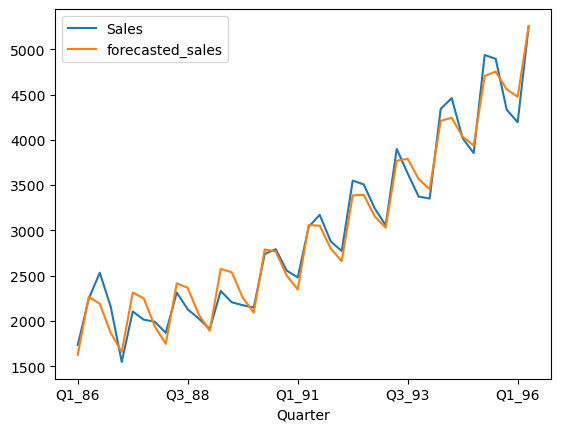

In [49]:
# plot the time series values for sales and forecasted_sales

df["Sales"].plot(legend=True)
df["forecasted_sales"].plot(legend=True);

## Forecasting through ARIMA MODEL

In [50]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.head() 

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [51]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [52]:
Quarters=pd.date_range("1986-01-01",periods=42,freq="QS")
df.set_index(Quarters,inplace=True)
df.head()

,Quarter,Sales
1986-01-01,Q1_86,1734.827000
1986-04-01,Q2_86,2244.960999
1986-07-01,Q3_86,2533.804993
1986-10-01,Q4_86,2154.962997
1987-01-01,Q1_87,1547.818996


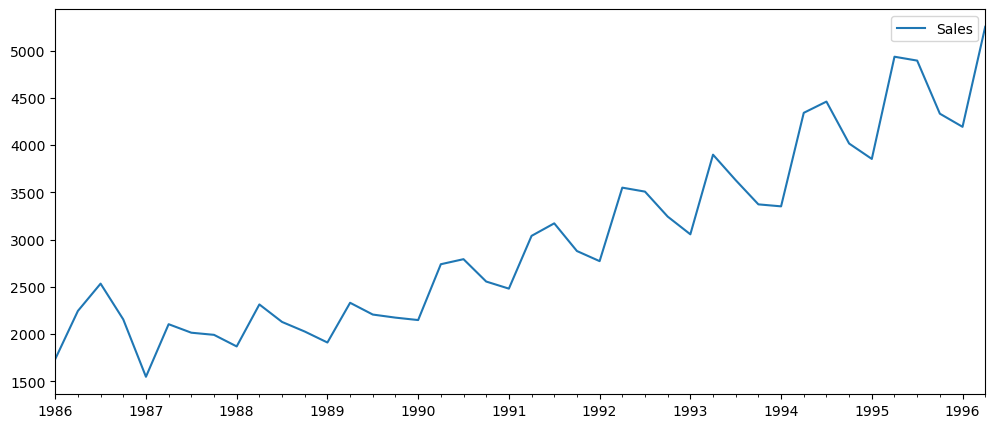

In [53]:
# visualize the data 
df.plot(figsize=(12,5)); 

In [54]:
len(df)

42

In [55]:
# split the data into train and test data with the last 8 Quarters as test data

train=df.iloc[:len(df)-8]
test=df.iloc[len(df)-8:]

In [56]:
train.shape,test.shape

((34, 2), (8, 2))

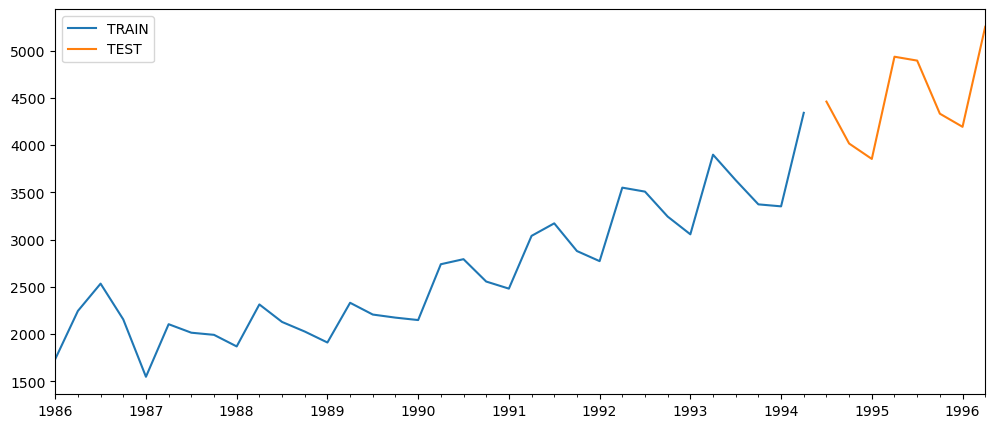

In [57]:
# plot the train and test data in different colors and labels 
train["Sales"].plot(legend=True,label="TRAIN",figsize=(12,5))
test["Sales"].plot(legend=True,label="TEST",figsize=(12,5));

In [58]:
# arima model parameters tuning with auto_arima
from pmdarima import auto_arima

In [59]:
auto_arima_model=auto_arima(train["Sales"],
                            start_p=0,
                            start_q=0,
                            max_p=5,
                            max_q=5,
                            d=1,
                            max_d=5,
                            start_P=0,
                            D=1,
                            max_P=5,
                            max_D=5,
                            m=4,
                            start_Q=0,
                            max_Q=5,
                            seasonal=True,trace=True,
                            error_action="ignore",suppress_warnings=True,
                            stepwise=False)

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=382.941, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=384.936, Time=0.03 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,1,3)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,4)[4]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,1,5)[4]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=384.936, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=388.549, Time=0.18 sec
 ARIMA(0,1,0)(1,1,3)[4]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(1,1,4)[4]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=386.890, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(2,1,3)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=384.629, Time=0.06 sec


In [60]:
auto_arima_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 4),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [61]:
# import the SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
# fit the SARIMAX model with the identified best parameters and forecast the test data

model=SARIMAX(train["Sales"],order=(0,1,0),seasonal_order=(0,1,0,4))
results=model.fit()
forecast=results.predict(start=len(train),
    end=len(train)+len(test)-1).rename("SARIMA Forecast")
forecast

1994-07-01    4072.0
1994-10-01    3816.0
1995-01-01    3795.0
1995-04-01    4785.0
1995-07-01    4515.0
1995-10-01    4259.0
1996-01-01    4238.0
1996-04-01    5228.0
Freq: QS-JAN, Name: SARIMA Forecast, dtype: float64

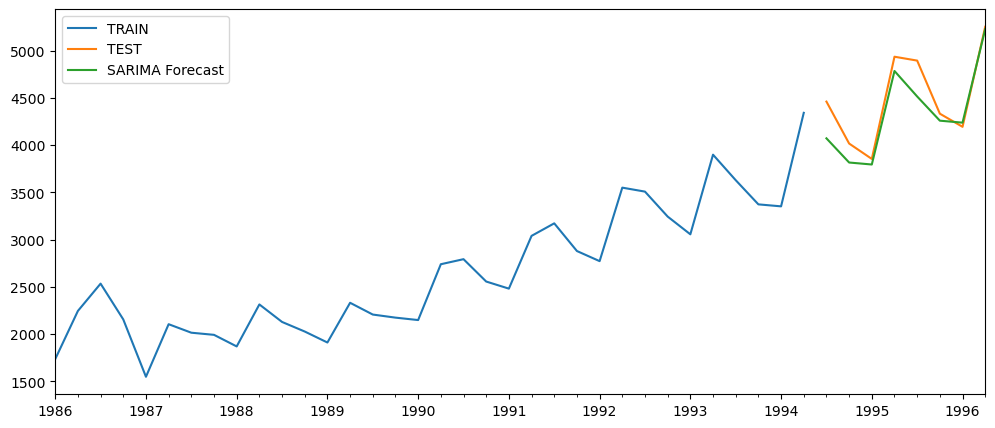

In [63]:
# plot the train ,test and forecast data 

train["Sales"].plot(legend=True,label="TRAIN",figsize=(12,5));

test["Sales"].plot(legend=True,label="TEST",figsize=(12,5));

forecast.plot(legend=True,figsize=(12,5));

In [64]:
# calcualte the RMSE for the SARIMA model
rmse_sarimax=rmse(test["Sales"],forecast)
rmse_sarimax

215.1862565314067